In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import pylab as pl
import scipy.signal as sig
import scipy.io as sio
import scipy.interpolate as sciint
from xmitgcm import open_mdsdataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.gridspec import GridSpec
from os.path import exists

from scipy.io import savemat, loadmat
import SVBfunc

from math import radians, cos, sin, asin, sqrt, atan, degrees, log

In [2]:
coast='smooth'

In [3]:
coastline=loadmat(str(coast) + '/BT_PALL.mat')

In [4]:
if coast =='original':
    distIN,depIN,iniXIN,iniYIN=coastline['dist'][0][:480], coastline['d'][0][:480],coastline['indexXlon'][0][:480],coastline['indexYlat'][0][:480]
else:
    distIN,depIN,iniXIN,iniYIN=coastline['dist'][0], coastline['d'][0,:],coastline['indexXlon'][0,:],coastline['indexYlat'][0,:]
    
    
    

In [5]:
len(depIN)

484

In [6]:
sp=[]
d=np.zeros((len(depIN),len(depIN[0][0])))
shelf=np.zeros(len(depIN))
shelfind=np.zeros(len(depIN))
for i in range(len(depIN)):
    dep=depIN[i][0]
    dist=distIN[i][0]
    ind=np.where(dist>=35)[0][0] 
    sp.append((dep[1:ind]-dep[:ind-1])/(dist[1:ind]-dist[:ind-1]))
    shelfind[i]=np.where(dep>=300)[0][0]
    shelf[i]=dep[shelfind[i].astype(int)]
    d[i,:len(dep)]=dep

In [7]:


colors=[ '#4daf4a', '#a65628', '#984ea3',
                   '#e41a1c', '#dede00','#377eb8'
       ,'#ff7f00','#f781bf','#999999']


s=np.zeros(len(dep))

for i in range(len(dep)):
    dep=depIN[i][0]
    dist=distIN[i][0]
    depin=dep[:np.where(dist>=40)[0][0]]
    distin=dist[:np.where(dist>=40)[0][0]]

    ho=np.mean(depin)
    lam=1/(distin[np.where(depin>=ho)[0][0]-1])
    hx=(depin[1:]-depin[:-1])/(distin[1:]-distin[:-1])

    s[i]=np.mean((hx/depin[:-1])*distin[:-1])

    #fig=plt.figure()
    #plt.plot(distin,-depin,linewidth=2)
    #plt.plot(distin[:-1],-((ho)*(lam*distin[:-1])**s[i]),'--')
    #plt.ylim([-3000,0])

#plt.scatter(corrinds,s)


In [8]:

hej2=[35,54,79,120,154,194,219]


pathETA=str(coast) + '/ETANAC.nc'
ds= xr.open_dataset(pathETA)

lon_ac=ds.lonAC.values
lat_ac=ds.latAC.values
distAC=ds.dist.values

pathVEL=str(coast) + '/WVELAC.nc'
dsVEL= xr.open_dataset(pathVEL)

WVEL=dsVEL.ValfiltAll.values
distVEL=dsVEL.dist.values
TIMEVEL=dsVEL.time2.values
lat_acVEL=dsVEL.latAC.values
lon_acVEL=dsVEL.lonAC.values




In [17]:
params = {'font.size': 16,
          'figure.figsize': (6, 15),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

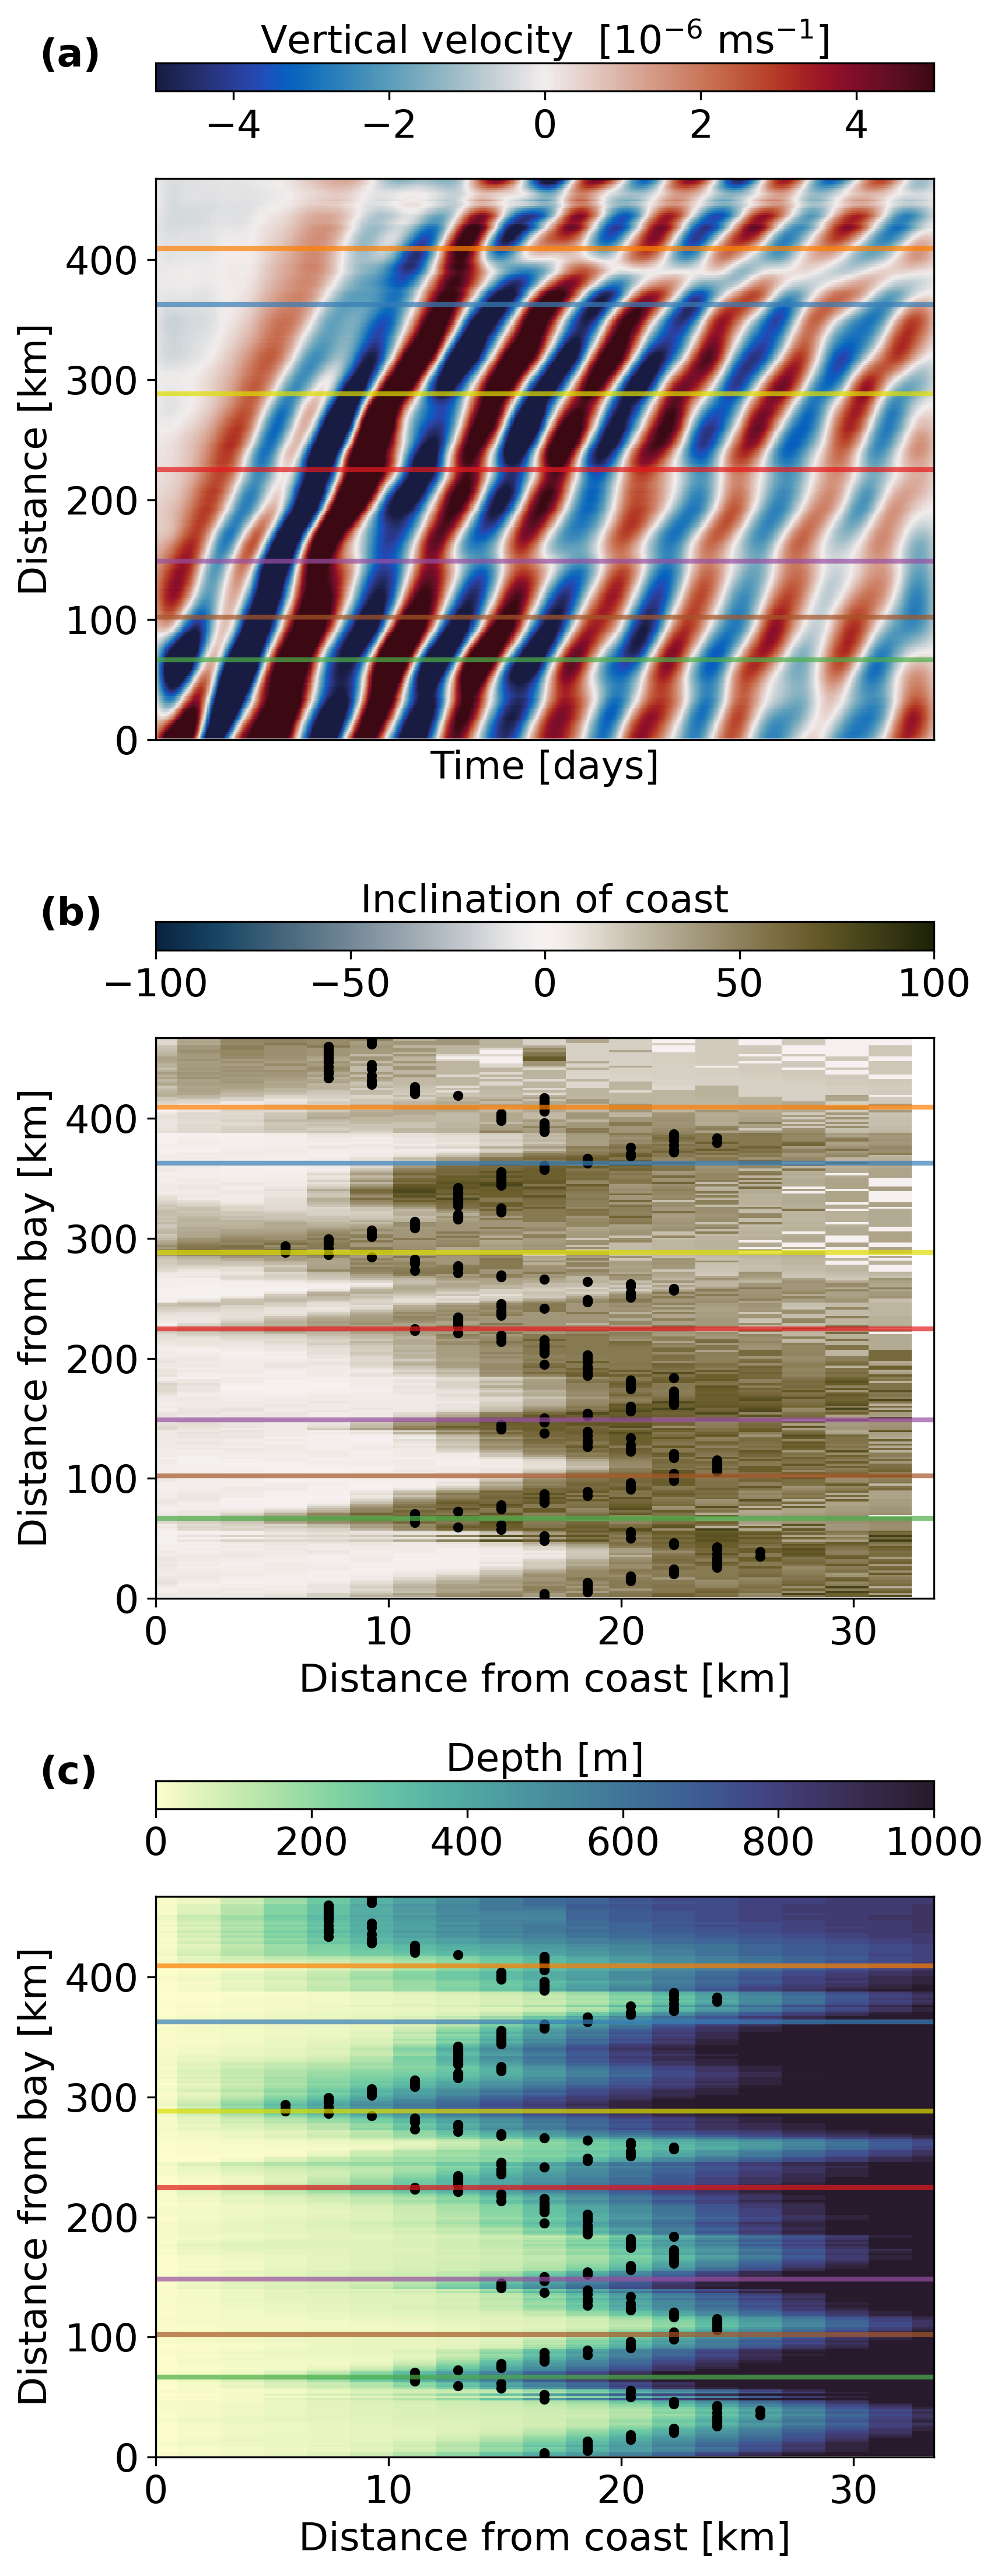

In [18]:


colors=[ '#4daf4a', '#a65628', '#984ea3',
                   '#e41a1c', '#dede00','#377eb8'
       ,'#ff7f00','#f781bf','#999999']

fig = plt.figure()
gs = GridSpec(nrows=3, ncols=1)

ax = fig.add_subplot(gs[0, 0])
vmin=-5
vmax=5
cbarall=0
SVBfunc.plot_HOVMOLLER(ax,distVEL,TIMEVEL,WVEL*1e6,'','Vertical velocity  [$10^{-6}$ ms$^{-1}$]',vmin,vmax,fig,lat_acVEL,lon_acVEL,1,cbarall,'(a)')
ax.set_ylim([0,distAC[250]])

for i in range(len(hej2)):#range(len(colors)):
     ax.axhline(y=distAC[hej2[i]],color=colors[i],linewidth=2,alpha=0.7)
     #ax.axhline(y=distAC[27*i],color=colors[i],linewidth=2,alpha=0.3)

    
xlab='Distance from coast [km]'
ylab='Distance from bay [km]'

distpl=distIN[0][0]

vmin=-100
vmax=100
ax = fig.add_subplot(gs[1, 0])
cax = ax.pcolormesh(distpl[:18],distAC,sp,cmap=cmocean.cm.diff,vmin=vmin,vmax=vmax)
ax.scatter(distpl[shelfind.astype(int)],distAC,color='k',s=10) 

ax.set_xlim([0,dist[ind-1]])
ax.set_ylim([0,distAC[250]])

ax.set(xlabel=xlab, ylabel=ylab)

divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('Inclination of coast')
ax.text(-0.15, 1.2, '(b)', fontweight='bold', color='k', 
        transform=ax.transAxes)

for i in range(len(hej2)):
     ax.axhline(y=distAC[hej2[i]],color=colors[i],linewidth=2,alpha=0.7)

ax = fig.add_subplot(gs[2, 0])
cax = ax.pcolormesh(distpl,distAC,d,cmap=cmocean.cm.deep,vmin=0,vmax=1000)
ax.scatter(distpl[shelfind.astype(int)],distAC,color='k',s=10) 

divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('Depth [m]')
ax.text(-0.15, 1.2, '(c)', fontweight='bold', color='k', 
        transform=ax.transAxes)


ax.set(xlabel=xlab, ylabel=ylab)
ax.set_xlim([0,dist[ind-1]])
ax.set_ylim([0,distAC[250]])


for i in range(len(hej2)):
     ax.axhline(y=distAC[hej2[i]],color=colors[i],linewidth=2,alpha=0.7)


fig.tight_layout()

NameError: name 'LON' is not defined

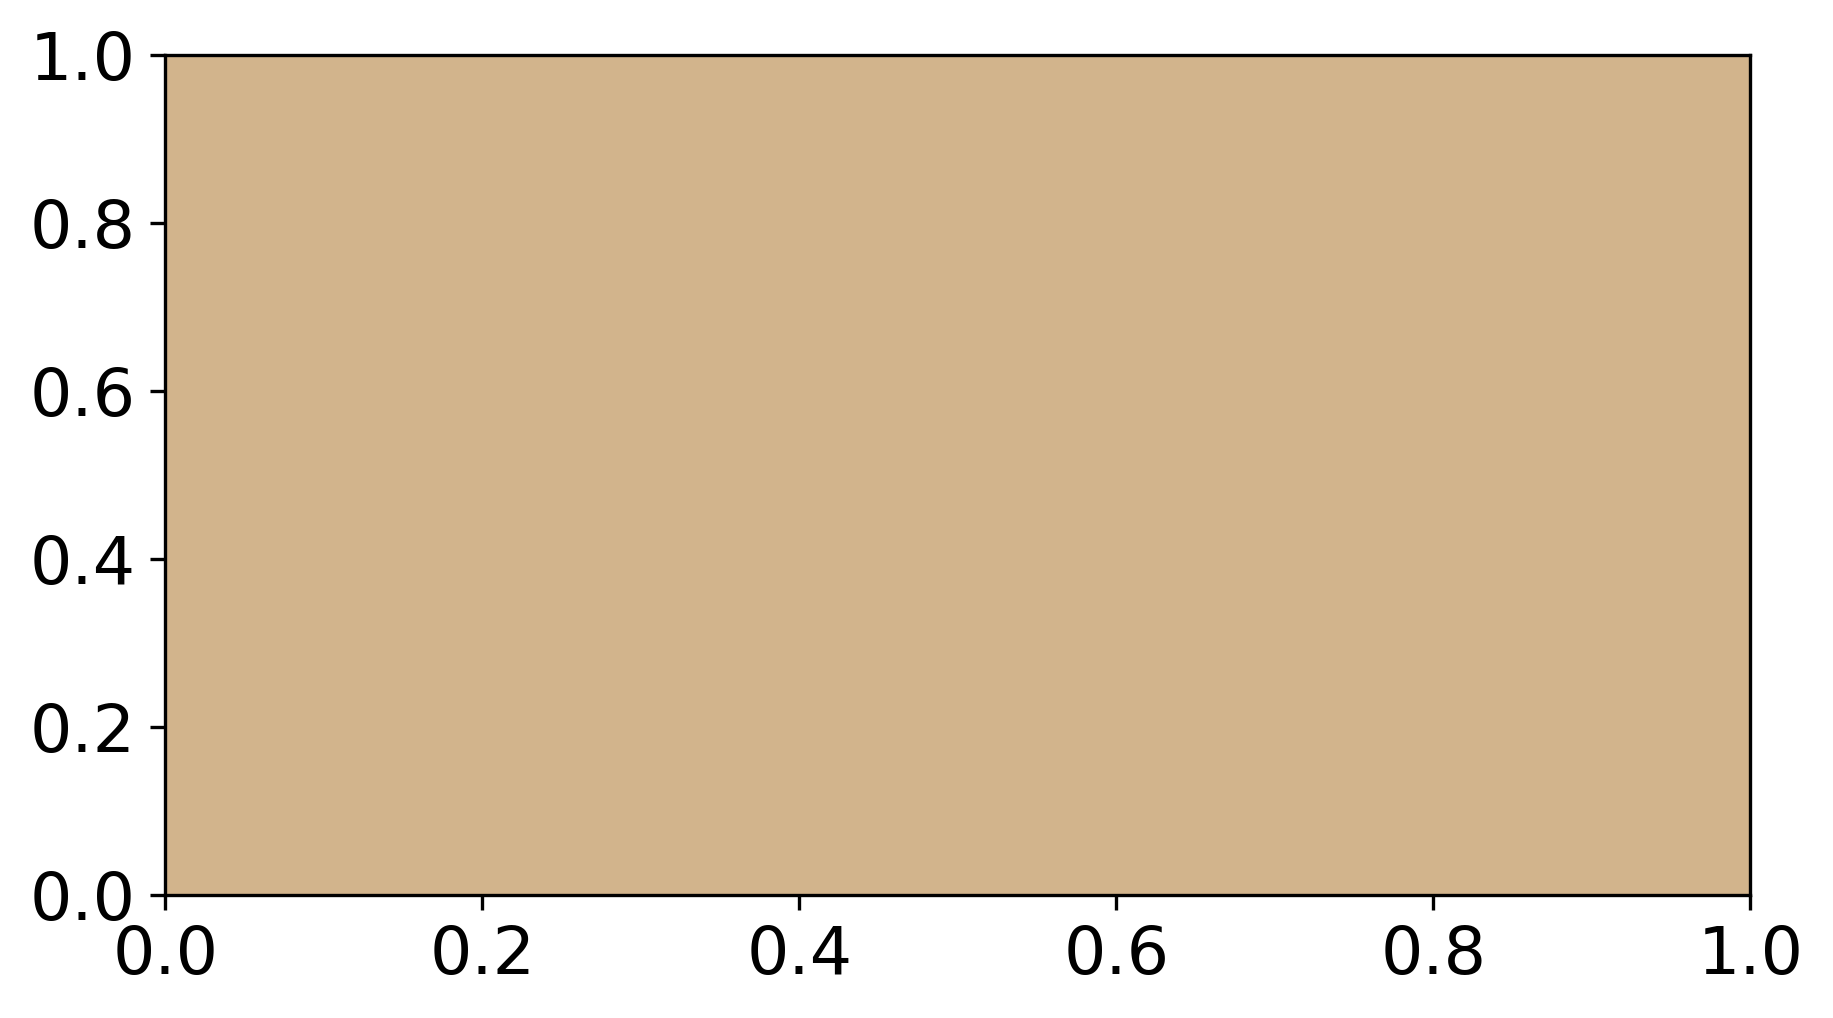

In [11]:


#dirn = '/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01b_noSVB_febTS/'
#dirw = '/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01b_SVB_febTS/'
#dsw, dsn = SVBfunc.loadNetCDFs(dirw, dirn, 'PHIHYD')


#LAT = dsw[0].YC
#LON = dsw[0].XC - 360

#Z = dsw[0].Z
#hFacC = dsw[0].hFacC

#hfa = np.ma.masked_values(hFacC[0, :, :], 0)
#mask = np.ma.getmask(hfa)

#depth = dsw[0].Depth
#depthno = dsn[0].Depth


#hfa = np.ma.masked_values(hFacC[55, :, :], 0)
#mask2 = np.ma.getmask(hfa)

fig = plt.figure()
gs = GridSpec(nrows=2, ncols=2)

ax = fig.add_subplot(gs[0, 0])
ax.set_facecolor('tan')
cax = ax.contourf(LON, LAT[lat_ac[:250]], np.ma.masked_array(depth[lat_ac[:250],:], mask=mask2[lat_ac[:250],:]), 50,vmin=0, vmax=5000, cmap=cmocean.cm.deep) 

 
cn = ax.contour(LON, LAT[lat_ac[:250]], depth[lat_ac[:250],:], colors=['0.2','0.4', '0.6', '0.8'],levels=[0,500, 1000, 2000])

divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('Depth [m]')
ax.text(-0.15, 1.2, (a), fontweight='bold', color='k', 
        transform=ax.transAxes)

ax.scatter(LON[lon_acVEL[hej2]],LAT[lat_acVEL[hej2]],s=0.5)
for i in range(len(hej2)):
     ax.axhline(y=LAT[lat_ac[hej2[i]]],color=colors[i],linewidth=2,alpha=0.4)

ax.set_xlabel('Lon [°]')
ax.set_ylabel('Lat [°]')

ax = fig.add_subplot(gs[0, 1])
vmin=-5
vmax=5
cbarall=1
SVBfunc.plot_HOVMOLLER(ax,distVEL,TIMEVEL,WVEL*1e6,'','Vertical velocity  [$10^{-6}$ ms$^{-1}$]',vmin,vmax,fig,lat_acVEL,lon_acVEL,1,cbarall,'(a)')
ax.set_ylim([0,distAC[250]])

for i in range(len(hej2)):#range(len(colors)):
     ax.axhline(y=distAC[hej2[i]],color=colors[i],linewidth=2,alpha=0.7)
     #ax.axhline(y=distAC[27*i],color=colors[i],linewidth=2,alpha=0.3)
'''
ax = fig.add_subplot(gs[0, 2])
ax.plot(s,distAC[:250])     
ax.set_ylim([0,distAC[250]])
ax.set(xlabel='s', ylabel='Distance from bay [km]')
'''

xlab='Distance from coast [km]'
ylab='Distance from bay [km]'

vmin=-200
vmax=200
ax = fig.add_subplot(gs[1, 0])
cax = ax.pcolormesh(dist[0][:ind-1],distAC[hej2],s,cmap=cmocean.cm.diff,vmin=vmin,vmax=vmax)
ax.scatter(dist[0][shelfind.astype(int)],distAC[hej2]) 


ax.set(xlabel=xlab, ylabel=ylab)

divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('Inclination of coast')
ax.text(-0.15, 1.2, '(c)', fontweight='bold', color='k', 
        transform=ax.transAxes)

for i in range(len(hej2)):
     ax.axhline(y=distAC[hej2[i]],color=colors[i],linewidth=2,alpha=0.7)

ax = fig.add_subplot(gs[1, 1])
cax = ax.pcolormesh(dist[0],distAC[:250],dep,cmap=cmocean.cm.diff,vmin=0,vmax=2000)
ax.scatter(dist[0][shelfind.astype(int)],distAC[:250]) 

divider = make_axes_locatable(ax)
axdiv = divider.new_vertical(size = '5%', pad = 0.5)
fig.add_axes(axdiv)
cbar_ax = plt.colorbar(cax, cax=axdiv,orientation='horizontal')
cbar_ax.ax.xaxis.set_label_position("top")
cbar_ax.set_label('Depth [m]')
ax.text(-0.15, 1.2, '(d)', fontweight='bold', color='k', 
        transform=ax.transAxes)


ax.set(xlabel=xlab, ylabel=ylab)
ax.set_xlim([0,dist[0][ind-1]])




for i in range(250):
     ax.axhline(y=distAC[:250],color=colors[i],linewidth=2,alpha=0.7)






In [ ]:
iniX=[]
iniY=[]
dist=[]
dep=[]

for i in range(250):
    ind=i

    lon1=LON[lon_ac[ind]]
    lat1=LAT[lat_ac[ind]]
    lon2=LON[-1]
    lat2=LAT[lat_ac[ind]]
    a=SVBfunc.haversine(lon1, lat1, lon2, lat2)

    lon3=LON[-1]
    lat3=LAT[0]

    b=SVBfunc.haversine(lon2, lat2, lon3, lat3)

    deg=-atan(a/b)
    R1=LON*cos(deg)-LAT*sin(deg)
    R2=LON*sin(deg)+LAT*cos(deg)

    startX=R1.sel(XC=LON[lon_ac[ind]]+360,YC=LAT[lat_ac[ind]])
    startY=R2.sel(XC=LON[lon_ac[ind]]+360,YC=LAT[lat_ac[ind]])

    indexX,indexY=np.where(np.isnan(R2.where(R2==startY).values)==False)

    Rcoast = R1[indexX,indexY]

    LONIN=R1[:indexX[0],indexY]

    LATIN=R2[(np.ones(len(R1[:indexX[0],indexY]))*indexX).astype(int),(indexY).astype(int)]

    R1Back=np.flip(LONIN.values*cos(-deg)-LATIN.values*sin(-deg))
    R2Back=np.flip(LONIN.values*sin(-deg)+LATIN.values*cos(-deg))

    indlon=np.flip(np.where(np.logical_and(LON>min(R1Back),LON<max(R1Back)))[0])
    indlat=np.flip(np.where(np.logical_and(LAT>min(R2Back),LAT<max(R2Back)))[0])                      

    Lati=LAT[indlat].values
    Loni=LON[indlon].values

    dist_array = np.zeros(len(Lati)-1)

    for jj in range(len(Lati)-1):
        lat1 = Lati[jj]
        lon1 = Loni[jj]
        lat2 = Lati[jj+1]
        lon2 = Loni[jj+1]
        dist_array[jj]=  SVBfunc.haversine(lat1, lon1, lat2, lon2)


    dist_rot = np.cumsum(dist_array)
    dist_rot = np.insert(dist_rot,0,0)

    hunKm=np.where(dist_rot>=100)[0][0]

    iniX.append(indlon[:hunKm])
    iniY.append(indlat[:hunKm])
    dist.append(dist_rot[:hunKm])
    deppre=depth.values[indlat[:hunKm],indlon[:hunKm]]
    dep.append(deppre[np.argpartition(deppre,range(10))])



mdic = {"dist": dist, "d":dep, 'indexXlon':iniX,'indexYlat':iniY }
savemat("BT_P.mat", mdic)

fig,(ax,ax1)=plt.subplots(1,2)
ax.set_facecolor('tan')
ax.set_title('Original')
pc = ax.contourf(LON, LAT, np.ma.masked_array(depth, mask=mask), 50,
              vmin=0, vmax=5000, cmap=cmocean.cm.deep) 

cb = plt.colorbar(pc)  
cn = ax.contour(LON, LAT, depth, colors=['0.2', '0.4', '0.6', '0.8'],
             levels=[200, 500, 1000, 2000])
cb.set_label('Depth [m]')
ax.contour(LON, LAT, depthno[:, :], levels=[0], colors='brown', linestyles=':', linewidths=2.5)

ax.set_xlabel('Lon [°]')
ax.set_ylabel('Lat [°]')
ax.set_box_aspect(1)


colors=[ '#4daf4a', '#a65628', '#984ea3',
                   '#e41a1c', '#dede00','#377eb8'
       ,'#ff7f00','#f781bf','#999999']

for i in range(len(dep)):
     ax.scatter(LON[iniX[i]].values,LAT[iniY[i]].values,color=colors[i],linewidth=2)
     plt.plot(dist[i],-dep[i],color=colors[i],linewidth=2)


     
plt.show()     
--------------------------------------------------------------------------------------